### Lesson 50:

### Screenshots and Image Recognition

Python can be used to control the keyboard and mouse, which allows us to automate any program that uses these as inputs. However, it currently does so blindly, depending on cartesian coordinates; we need a way to show the program the screen.

`pyautogui` also contains the `pillow` imaging model, to help create quick screenshots and show the computer the current screen state. Working with `pillow` for image recongition is covered in more detail in [Chapter 17 of Mr. Sweigart's blog](https://automatetheboringstuff.com/chapter17/).

In [9]:
import pyautogui

We can use the `screenshot()` function to take a screenshot of the current screen.

In [7]:
# let us first change directory to the `files` subdirectory, to store these values
import os

os.chdir('files')
os.getcwd()

'/Users/vivek.menon/Dropbox/learn/practice/python/AutomateTheBoringStuffWithPython/files'

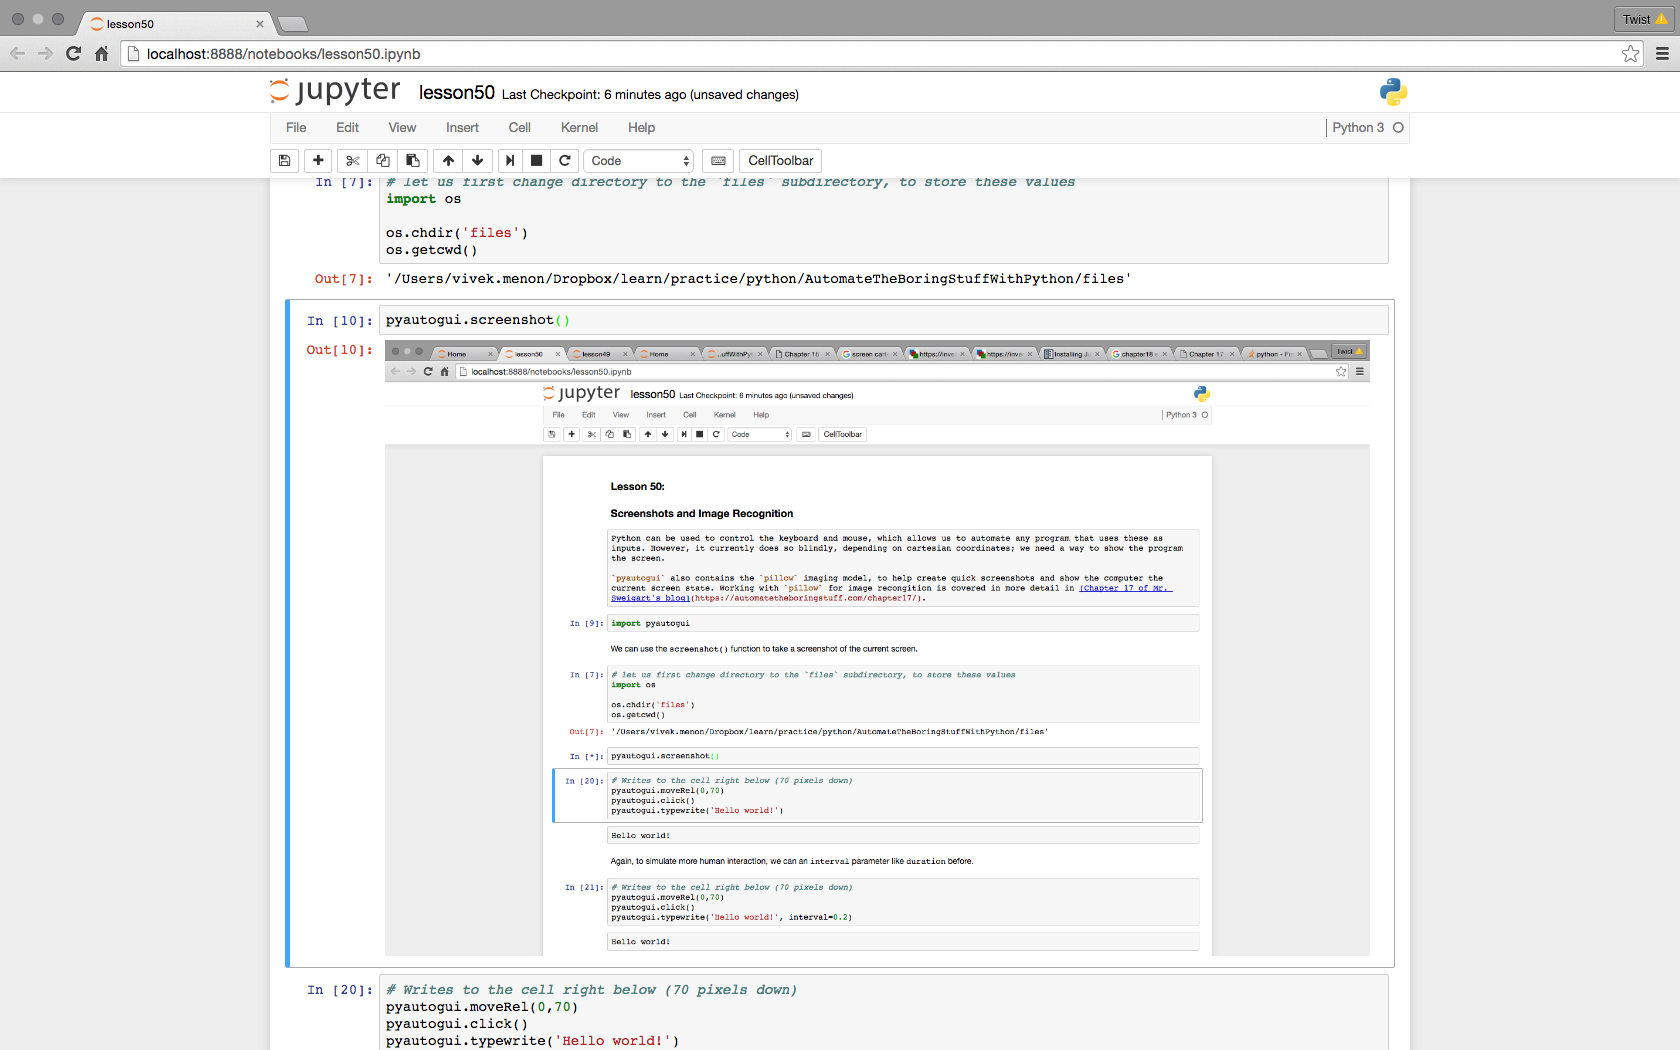

In [11]:
pyautogui.screenshot()

This creates an immediate screenshot file, stored in memory. To save it to the file, we can pass a file path to it.

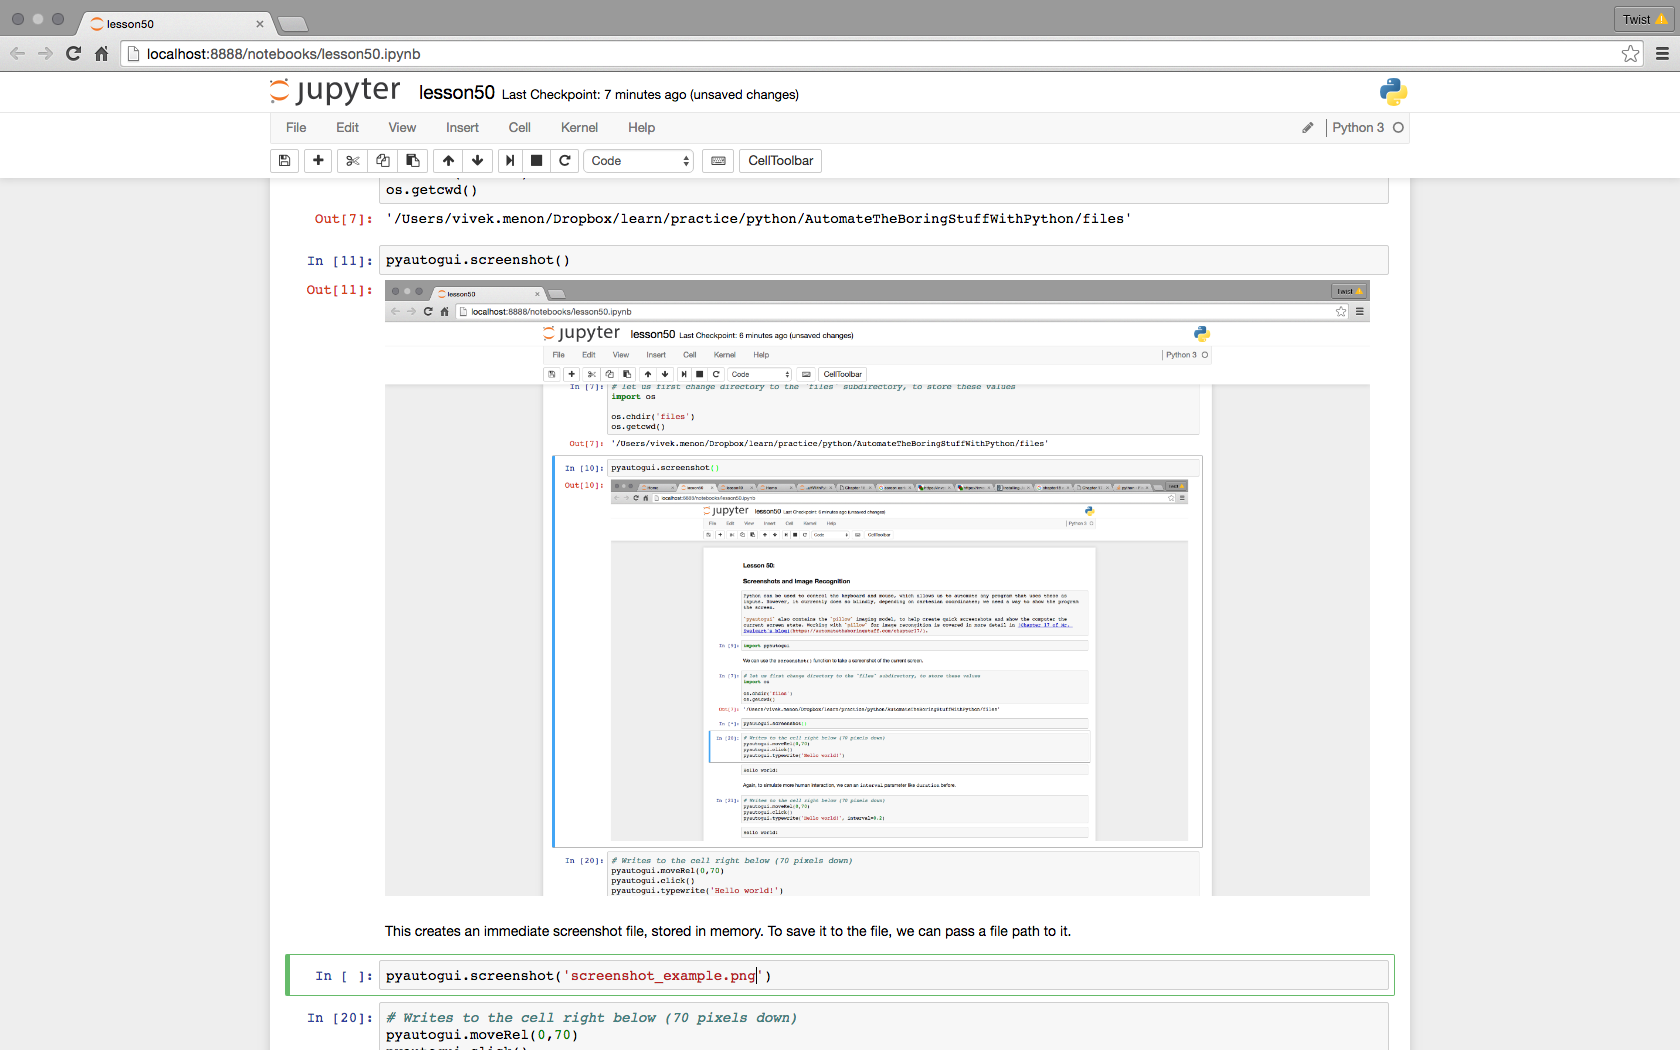

In [12]:
pyautogui.screenshot('screenshot_example.png')

Now, the module can 'see' the screen, but to do proper image recognition, we must use the the `locateOnScreen()` function. We will use the default OSX calculator for this example:

![calculator](files/calc.png)

We will be searching for the '7' key on this calculator, using this cropped version:

![calculator](files/calc7key.png)

We can now pass this file to the `locateOnScreen()` function, and see if the program can find it in on the screen currently.

In [14]:
pyautogui.locateOnScreen('calc7key.png')

(843, 299, 57, 48)

It has returned a tuple of 4 integers:
* The x coordinate where it located that image.
* The y coordinate of where it located that image.
* The width of that image (given by file).
* The height of that image (given by file).

A more useful version of this is the `locateCenterOnScreen()`, which centers in that object, allowing for better interaction.

In [18]:
pyautogui.locateCenterOnScreen('calc7key.png')

(1309, 595)

We can now move to and click the calculator.

In [19]:
pyautogui.moveTo((1309, 595), duration=1)
pyautogui.click((1309, 595), clicks = 7)

![calc output](files/calcoutput.png)

There are a few caveats with GUI automation that may affect its performance:
* The `locateOnScreen()` function is computationally intensive, and may effect runtimes significantly; it cannot perform effectively in a dynamic environment. 
* The image matches used must be 'pixel perfect' to be correctly interpreted.
* The documentation includes more examples of how to use partial images and other methods to speed up performance. 
* This method also only works when the image is fully visible from the default screen; anything covered up can't be found. 

While this isn't ideal for some environments, it can have particularly useful applications, like winning at [Sushi Go](https://github.com/asweigart/sushigoroundbot).

![sushigo](http://inventwithpython.com/blogstatic/sushigoroundbot.jpg?27f655)

### Recap
* A screenshot is an image of the screen's content.
* The `pyautogui.screenshot()` will return an Image object of the screen, or you can pass it a filename to save it to a file.
* The `pyautogui.locateOnScreen()` is passed a sample image file, and returns the coordinates of where it is on the screen.
* `pyautogui.locateCenterOnScreen()` returns the (x, y) tuple of the center of the image found on the scren.
* Combining the keyboard/mouse/screenshot functions let's you make awesome automated GUI stuff. 